# **Bivariate Multifractal Analysis (BiMFA)**





# **📌 Theoretical Background of Bivariate Multifractal Analysis (BiMFA)**

Multifractality describes signals that exhibit different levels of singularity across different time scales. Traditional fractal analysis assumes a single scaling exponent, but **multifractal analysis (MFA)** allows for a **spectrum of scaling exponents**, providing a richer description of complex signals.

MFA is typically performed using **wavelets**, which break down a signal into different frequency components. A key tool in this process is the **p-leader formalism**, which extracts **local singularities** at multiple scales.

#### **Key Quantities in Univariate MFA:**
- **Wavelet coefficients**: Measure local fluctuations of a signal.
- **p-Leaders**: Improve wavelet coefficients by incorporating local information across scales.
- **Scaling exponents** $( $zeta(q) $): Describe how fluctuations scale with scale $( j $).
- **Log-cumulants** $( c_q $): Quantify the strength of multifractality.



## **Bivariate Multifractal Analysis (BiMFA)**
### **Why Bivariate?**
Univariate MFA characterizes one signal at a time. However, **many real-world applications involve multiple interacting signals** (e.g., fMRI brain regions, financial time series, turbulence). **BiMFA** extends MFA to study the joint multifractal properties of two signals.

### **Core Idea**
Instead of analyzing a single signal’s singularity structure, BiMFA examines **how two signals co-evolve in their singularity properties** by:
1. **Computing joint structure functions** $( S(q_1, q_2) $).
2. **Extracting bivariate log-cumulants** $( C_{m_1, m_2} $).
3. **Computing the multifractal correlation coefficient** $( $rho_{mf} $).



### **Step 1: Compute p-Leaders for Each Signal**
- Extract p-leaders from **both signals** using a wavelet transform.
- P-leaders quantify **local singularities** at different scales.

### **Step 2: Compute Joint Structure Functions $( S(q_1, q_2) $)**
The **joint structure function** is given by:

$[
S(q_1, q_2, j) = \langle |L_j^{(1)}|^{q_1} |L_j^{(2)}|^{q_2} \rangle
$]


where:
- $( L_j^{(1)} $) and $( L_j^{(2)} $) are the p-leaders of the two signals at scale $( j $).
- $( q_1, q_2 $) are moment orders.
- $( $langle $cdot $rangle $) denotes averaging over all coefficients at scale $( j $).



### **Step 3: Compute Bivariate Log-Cumulants $( C_{m_1, m_2} $)**
- Log-cumulants describe how **joint fluctuations** scale across different exponents.
- They are obtained from a **linear regression of log-structure functions**.

#### **Common Bivariate Cumulants Used in BiMFA**
- **$( C_{20} $)**: Measures multifractality of **Signal 1**.
- **$( C_{02} $)**: Measures multifractality of **Signal 2**.
- **$( C_{11} $)**: Measures **cross-multifractality** (how singularities in both signals are correlated).



### **Step 4: Compute Multifractal Correlation Matrix $( $rho_{mf} $)**
To quantify **the degree of multifractal correlation between two signals**, we define:

$[
\rho_{mf} = \frac{C_{11}}{\sqrt{C_{20} C_{02}}}
$]

This ensures:
- **$( $rho_{mf} $approx 1 $)** → The signals are strongly correlated in their singularities. The two signals are not just correlated in amplitude, but their multifractal nature is aligned.
- **$( $rho_{mf} $approx 0 $)** → The signals are independent.
- **$( $rho_{mf} < 0 $)** → Anti-correlated singularities.


In [ ]:
import pooch
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from pymultifracs import wavelet_analysis
from pymultifracs.bivariate import bimfa

---
## **🔹 Step 1: Load Bivariate Data**

We will use a dataset containing **two correlated multifractal time series**.

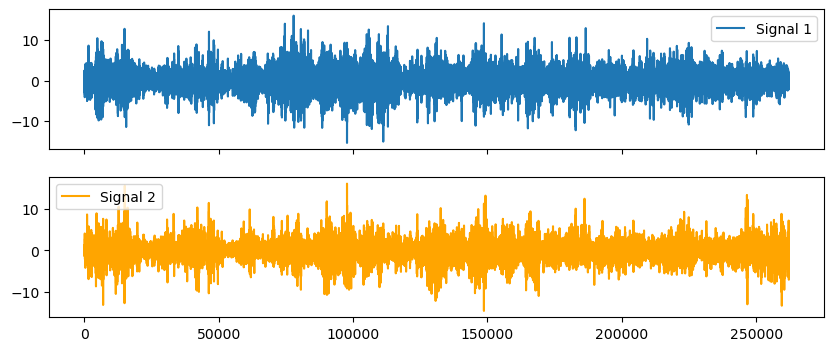

In [ ]:
# Download the dataset

nb_generated_series = 2

url = ('https://github.com/neurospin/pymultifracs/raw/refs/heads/master/tests/'
       'data/DataSet_ssMF.mat')
fname = pooch.retrieve(url=url, known_hash=None, path=pooch.os_cache("bivar"))

# Load data
X = loadmat(fname)['data'].T

# Plot the two signals
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 4))
ax[0].plot(X[:, 0], label="Signal 1")
ax[0].legend()
ax[1].plot(X[:, 1], label="Signal 2", color='orange')
ax[1].legend()
plt.show()

In [19]:
X.shape

(262144, 2)

## **🔹 Step 2: Compute p-leaders**

We use wavelet-based p-leader decomposition to analyze local singularities in both signals.

In [9]:
# Compute wavelet leaders
WTpL = wavelet_analysis(X).integrate(.75).get_leaders(2)

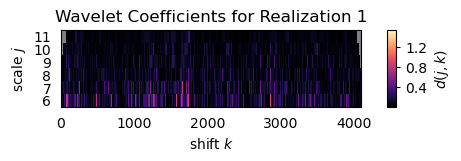

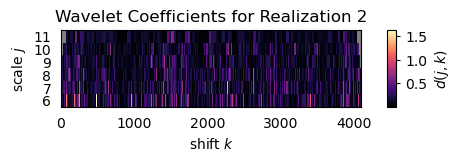

In [25]:
for i in range(nb_generated_series):
    WT_realization = wavelet_analysis(X[:, i], wt_name='db3')  # i-th time series
    WT_realization.plot(j1=6, j2=11)
    plt.title(f"Wavelet Coefficients for Realization {i+1}")
    plt.show()


In [ ]:
def count_wavelet_coeffs_all_realizations(wavelet_obj, name):
    print(f"$n📌 {name} - Number of Coefficients per Scale for Each Realization:")
    for j, values in wavelet_obj.values.items():
        n_realizations = values.shape[1] if values.ndim > 1 else 1  # Check if multiple realizations exist
        print(f"Scale {j}: {values.shape[0]} coefficients per realization ({n_realizations} realizations)")

# Call the function for each wavelet object
count_wavelet_coeffs_all_realizations(WTpL, "Wavelet p-Leaders (WTpL)")



📌 Wavelet p-Leaders (WTpL) - Number of Coefficients per Scale for Each Realization:
Scale 1: 131073 coefficients per realization (2 realizations)
Scale 2: 65536 coefficients per realization (2 realizations)
Scale 3: 32768 coefficients per realization (2 realizations)
Scale 4: 16384 coefficients per realization (2 realizations)
Scale 5: 8192 coefficients per realization (2 realizations)
Scale 6: 4096 coefficients per realization (2 realizations)
Scale 7: 2048 coefficients per realization (2 realizations)
Scale 8: 1024 coefficients per realization (2 realizations)
Scale 9: 512 coefficients per realization (2 realizations)
Scale 10: 256 coefficients per realization (2 realizations)
Scale 11: 128 coefficients per realization (2 realizations)
Scale 12: 64 coefficients per realization (2 realizations)
Scale 13: 32 coefficients per realization (2 realizations)
Scale 14: 16 coefficients per realization (2 realizations)
Scale 15: 8 coefficients per realization (2 realizations)


## **🔹 Step 3: Perform Bivariate Multifractal Analysis**


We apply BiMFA to measure the joint multifractal properties of both signals.

In [11]:
# Define moment orders for analysis
q1 = np.array([0, 1, 2])  # Exponents for first signal
q2 = np.array([0, 1, 2])  # Exponents for second signal

# Compute bivariate multifractal analysis
pwt = bimfa(WTpL, WTpL, scaling_ranges=[(3, 9)], q1=q1, q2=q2)

In [27]:
print("Multifractal correlation matrix (rho_mf):")
print(pwt.cumulants.rho_mf.squeeze())

Multifractal correlation matrix (rho_mf):
[[1.         0.71314563]
 [0.71314563 1.        ]]


✔️ **Interpretation:**  

-  The multifractal correlation matrix quantifies whether the multifractal properties of 2 signals evolve similarly at all scales.
he **diagonal elements** indicate that **each signal is perfectly correlated with itself**.
- The **off-diagonal elements** ($( 0.7131 $)) indicates a moderate-to-strong correlation between the multifractal properties of the two signals.
- The two signals are not identical but exhibit some level of shared multifractality.

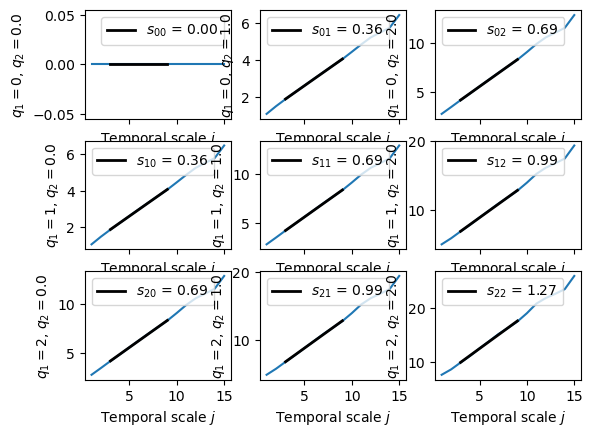

In [13]:
pwt.structure.plot()

- Each subplot corresponds to a different pair $( (q_1, q_2) $), where:
    - **$( q_1 $)** controls the moment order of **Signal 1**.
    - **$( q_2 $)** controls the moment order of **Signal 2**.
    - **The scaling exponent $( S_{q_1, q_2} $) (label in each subplot) describes the power-law behavior of the structure function.**


- **Symmetry in Structure Functions**
    - This symmetry means the way **singularities in Signal 1 affect Signal 2** is **statistically reciprocal**.

- **Similar Values of $( S_{02} $), $( S_{20} $), and $( S_{22} $)**
    - These exponents describe the **multifractal properties of each signal individually**.
    - If $( S_{02} $approx S_{20} $), then **the two signals have similar multifractality strength**.

- **Similar Values of $( S_{10} $), $( S_{01} $), and $( S_{11} $)**
    - These indicate **cross-multifractal** properties.
    - If $( S_{11} $) is significantly different from $( S_{10} $) and $( S_{01} $), the signals may **not be trivially related**.

- **Flat Lines in Some Cases (e.g., $( S_{00} $))**
    - A flat line suggests **no scaling behavior** at that moment order.
    - This could indicate that for certain combinations of $( q_1, q_2 $), the signals do not exhibit significant multifractality.

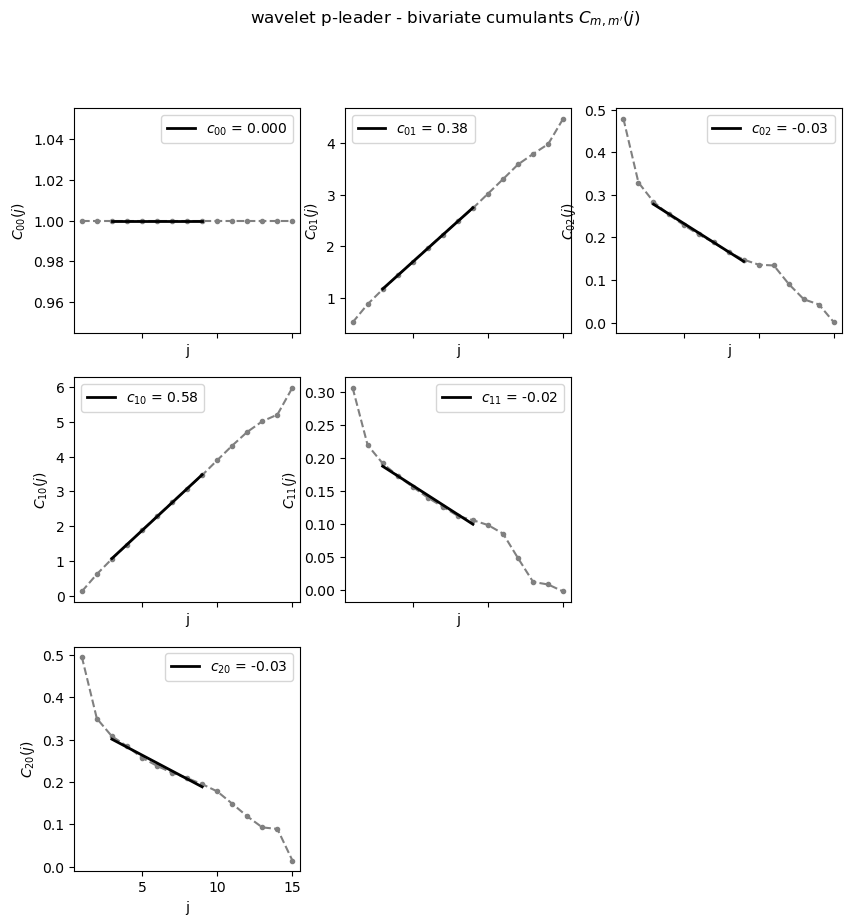

In [14]:
pwt.cumulants.plot()

✔️ **Interpretation:**  

| **Bivariate Log-Cumulant** | **Interpretation** |
|----------------|----------------------------|
| **$( C_{00} = 0.00 $)** | No relevant information (expected by definition). |
| **$( C_{10} = 0.58 $)** | Indicates a significant scaling behavior for **Signal 1**. |
| **$( C_{01} = 0.38 $)** | The second signal also exhibits multifractal properties, but weaker than Signal 1. |
| **$( C_{20} = -0.03 $), $( C_{02} = -0.03 $)** | Close to zero, indicating weak second-order multifractality. |
| **$( C_{11} = -0.02 $)** | Close to zero, meaning the two signals do **not exhibit strong multifractal interaction**. |


- **The steep slope in the structure function** suggested stronger multifractality in **Signal 1 compared to Signal 2**, which is now confirmed by $( C_{10} > C_{01} $).  
- **Negative and weak second-order cumulants $( C_{20}, C_{02} $)** suggest that **higher-order multifractality is weak**, which aligns with the structure function plots **showing moderate variation across different $( q_1, q_2 $)** values.  
- **The near-zero cross-multifractal term $( C_{11} $)**:
  - This suggests that the **cross-multifractality is weak**.
  - In other words, while the signals may have **strong individual multifractal properties**, their joint multifractal interactions are **not highly correlated**.


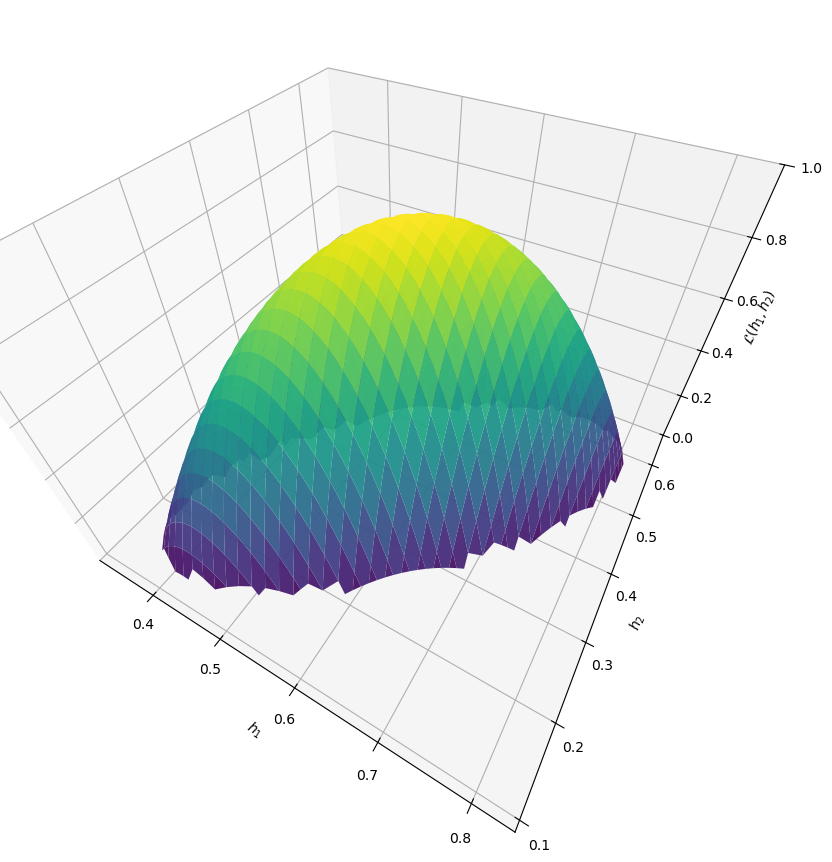

In [15]:
pwt.cumulants.plot_legendre(h_support=(.1, .95))

✔️ **Interpretation:**  


- This is a **Legendre spectrum**, a 3D representation of the multifractal properties of two signals. It provides insights into the **distribution of singularities** in both signals and whether they share a common multifractal structure.

- **X-axis (`h_1`)**: Hölder exponent for **Signal 1**, describing its **local singularity strength**.
- **Y-axis (`h_2`)**: Hölder exponent for **Signal 2**, describing its **local singularity strength**.
- **Z-axis (`f(h_1, h_2)`)**: Represents how much of the data exhibits a particular singularity strength.  
  - **Higher values (yellow region)** → Most **dominant** singularity strengths.  
  - **Lower values (purple region)** → Less frequent singularities.


- **Presence of a Smooth, Well-Defined Surface**
   - The plot shows a **smooth and continuous surface**, which confirms that **both signals exhibit multifractality**.
   - A **clear peak** suggests a dominant singularity structure that characterizes both signals.

- **Moderate Width of the Surface**
   - The **spread along \( h_1 \) and \( h_2 \)** is not extremely broad but not too narrow either.
   - This suggests **a moderate level of multifractality** in both signals.
   - If the spread were **very wide**, it would indicate a **stronger multifractal structure**.

- **Symmetry Around \( h_1 = h_2 \)**
   - The shape appears **roughly symmetric**, meaning the two signals share **some common singularity properties**.
   - However, if there were a noticeable skew, it would mean that one signal is more multifractal than the other.


### **Final Conclusion**

- The two signals exhibit weak bivariate multifractality, meaning they share some multifractal structure but are not strongly interdependent. 
- While the Legendre spectrum confirms some common singularity behavior, the multifractal correlation matrix and log-cumulants indicate that their singularities do not systematically co-evolve.